- HTS 데이터의 경우 높은 저해율을 가지는 데이터 수가 적으므로 저해율 퍼센트 100이상인 데이터들을 100으로 변환하여 데이터셋을 만들었다.
- 특히 여기서 aid_1671201 데이터의 경우 동일 실험에 대해 3번 반복한 실험결과값이 포함되어 있어 inhibition 1, 2, 3으로 데이터셋을 보고 데이터의 동일 실험에서의 차이 변화를 확인하였으며, 실제로 학습에 사용할 데이터셋으로 활용할 때에는 이상치를 제외한 평균값을 내고 싶었기에, 세 실험값 중 차이가 큰 데이터를 제외하고 나머지 두 데이터의 평균을 내어 AID_1671201_mean.csv 파일을 생성하여 학습에 활용하였다.

In [ ]:
import pandas as pd

file_path = r'../pubchem_data/HTS/AID_1671201_datatable_all.csv'

df = pd.read_csv(file_path, header=0, skiprows=[1, 2, 3, 4, 5])

print("--- DataFrame (from file) ---")
print(df.head())

C:\Users\WooSomin\AppData\Local\Temp\ipykernel_14664\3467362085.py:8: DtypeWarning: Columns (129,134,141,169,174,181,209,214,221,249,254,261,289,294,301,329,334,341,369,374,381,409,414,421,449,454,461,489,494,501,529,534,541,569,574,581,609,614,621,649,654,661,689,694,701,729,734,741,769,774,781,809,814,821,849,854,861,889,894,901,929,934,941,969,974,981,1009,1014,1021,1049,1054,1061,1089,1094,1101,1129,1134,1141,1169,1174,1181,1209,1214,1221,1249,1254,1261,1289,1294,1301,1329,1334,1341,1369,1374,1381,1409,1414,1421,1449,1454,1461,1489,1494,1501,1529,1534,1541,1569,1574,1581,1609,1614,1621,1649,1654,1661,1689,1694,1701,1729,1734,1741,1769,1774,1781,1809,1814,1821,1849,1854,1861,1889,1894,1901,1929,1934,1941,1969,1974,1981,2009,2014,2021) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=0, skiprows=[1, 2, 3, 4, 5])


--- DataFrame (from file) ---
   PUBCHEM_RESULT_TAG  PUBCHEM_SID  PUBCHEM_CID  \
0                   1    144205501      17931.0   
1                   2    144206117    3045407.0   
2                   3    144206325      14708.0   
3                   4    144206326    3085168.0   
4                   5    144206328      54158.0   

                       PUBCHEM_EXT_DATASOURCE_SMILES PUBCHEM_ACTIVITY_OUTCOME  \
0          CN1C(=S)CN=C(C2=C1C=CC(=C2)Cl)C3=CC=CC=C3             Inconclusive   
1  CO[C@H]1[C@@H](C[C@@H]2CN3CCC4=C([C@H]3C[C@@H]...                   Active   
2  C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@]2(C)O)CC[C@@...                   Active   
3  CC1=NC=C(C(=N1)N)CN(C=O)/C(=C(\CCO)/SS/C(=C(/C...                   Active   
4     CC1=CC(=C(C(=C1NC(=O)CN(CC(=O)O)CC(=O)O)C)Br)C                 Inactive   

   PUBCHEM_ACTIVITY_SCORE                               PUBCHEM_ACTIVITY_URL  \
0                      21  http://assay.nih.gov/htsws/rest/display/tox21-...   
1               

In [ ]:
df.isnull().sum()

PUBCHEM_RESULT_TAG                        0
PUBCHEM_SID                               0
PUBCHEM_CID                             143
PUBCHEM_EXT_DATASOURCE_SMILES           143
PUBCHEM_ACTIVITY_OUTCOME                  0
                                       ... 
Activity at 2306.0 uM-Replicate_51     9667
Activity at 5157.0 uM-Replicate_51     9667
Activity at 11530.0 uM-Replicate_51    9667
Activity at 25780.0 uM-Replicate_51    9667
Activity at 57660.0 uM-Replicate_51    9667
Length: 2049, dtype: int64

In [ ]:
df.columns.tolist()

['PUBCHEM_RESULT_TAG',
 'PUBCHEM_SID',
 'PUBCHEM_CID',
 'PUBCHEM_EXT_DATASOURCE_SMILES',
 'PUBCHEM_ACTIVITY_OUTCOME',
 'PUBCHEM_ACTIVITY_SCORE',
 'PUBCHEM_ACTIVITY_URL',
 'PUBCHEM_ASSAYDATA_COMMENT',
 'Phenotype-Replicate_1',
 'Potency-Replicate_1',
 'Efficacy-Replicate_1',
 'Analysis Comment-Replicate_1',
 'Activity_Score-Replicate_1',
 'Curve_Description-Replicate_1',
 'Fit_LogAC50-Replicate_1',
 'Fit_HillSlope-Replicate_1',
 'Fit_R2-Replicate_1',
 'Fit_InfiniteActivity-Replicate_1',
 'Fit_ZeroActivity-Replicate_1',
 'Fit_CurveClass-Replicate_1',
 'Excluded_Points-Replicate_1',
 'Max_Response-Replicate_1',
 'Activity at 0.0000074871 uM-Replicate_1',
 'Activity at 0.0000171744 uM-Replicate_1',
 'Activity at 0.0000679832 uM-Replicate_1',
 'Activity at 0.0001617185 uM-Replicate_1',
 'Activity at 0.0003741538 uM-Replicate_1',
 'Activity at 0.0007703449 uM-Replicate_1',
 'Activity at 0.00214 uM-Replicate_1',
 'Activity at 0.00651 uM-Replicate_1',
 'Activity at 0.017 uM-Replicate_1',
 'Act

In [ ]:
df_sel = df[['PUBCHEM_EXT_DATASOURCE_SMILES'] +
            [col for col in df.columns
             if 'Activity at 10.46 uM-Replicate_' in col and
                int(col.split('_')[-1]) <= 3]]


In [ ]:
df_sel = df_sel[(df_sel['Activity at 10.46 uM-Replicate_1'] < 0) &
                (df_sel['Activity at 10.46 uM-Replicate_2'] < 0) &
                (df_sel['Activity at 10.46 uM-Replicate_3'] < 0)]


In [ ]:
df_sel

,PUBCHEM_EXT_DATASOURCE_SMILES,Activity at 10.46 uM-Replicate_1,Activity at 10.46 uM-Replicate_2,Activity at 10.46 uM-Replicate_3
0,CN1C(=S)CN=C(C2=C1C=CC(=C2)Cl)C3=CC=CC=C3,-11.3919,-4.2455,-16.7103
1,CO[C@H]1[C@@H](C[C@@H]2CN3CCC4=C([C@H]3C[C@@H]...,-73.8999,-70.7295,-66.6895
2,C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@]2(C)O)CC[C@@...,-2.3957,-1.0278,-3.6433
3,CC1=NC=C(C(=N1)N)CN(C=O)/C(=C(\CCO)/SS/C(=C(/C...,-29.9765,-21.4797,-29.1646
5,CCCC(=O)OC[C@H]([C@H]([C@H](CN1C2=C(C=C(C(=C2)...,-87.9841,-89.4623,-89.0836
...,...,...,...,...
9647,COC1=CC(=C(C=C1)OC)C=O,-0.5434,-3.6198,-2.5080
9648,C/C=C/C1=CC(=C(C=C1)OC)OC,-21.4830,-17.6478,-19.4948
9651,CN1C=CC=C1,-2.1444,-1.9505,-0.5792
9662,CCC1=C(C(=CC=C1)CC)N(COC)C(=O)CS(=O)(=O)[O-].[...,-0.3944,-11.6934,-0.0513


In [ ]:
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2957 entries, 0 to 9664
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   PUBCHEM_EXT_DATASOURCE_SMILES     2909 non-null   object 
 1   Activity at 10.46 uM-Replicate_1  2957 non-null   float64
 2   Activity at 10.46 uM-Replicate_2  2957 non-null   float64
 3   Activity at 10.46 uM-Replicate_3  2957 non-null   float64
dtypes: float64(3), object(1)
memory usage: 115.5+ KB


In [ ]:
df_sel.isnull().sum()

PUBCHEM_EXT_DATASOURCE_SMILES       48
Activity at 10.46 uM-Replicate_1     0
Activity at 10.46 uM-Replicate_2     0
Activity at 10.46 uM-Replicate_3     0
dtype: int64

In [ ]:
df_sel = df_sel.dropna()
df_sel.isnull().sum()

PUBCHEM_EXT_DATASOURCE_SMILES       0
Activity at 10.46 uM-Replicate_1    0
Activity at 10.46 uM-Replicate_2    0
Activity at 10.46 uM-Replicate_3    0
dtype: int64

In [ ]:
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2909 entries, 0 to 9664
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   PUBCHEM_EXT_DATASOURCE_SMILES     2909 non-null   object 
 1   Activity at 10.46 uM-Replicate_1  2909 non-null   float64
 2   Activity at 10.46 uM-Replicate_2  2909 non-null   float64
 3   Activity at 10.46 uM-Replicate_3  2909 non-null   float64
dtypes: float64(3), object(1)
memory usage: 113.6+ KB


In [ ]:
import pandas as pd
from rdkit import Chem
import io

def smiles_to_canonical(smiles_str):
    try:
        mol = Chem.MolFromSmiles(smiles_str)
        if mol is not None:
            return Chem.MolToSmiles(mol)
        return None
    except:
        return None

df_sel['Canonical_Smiles'] = df_sel['PUBCHEM_EXT_DATASOURCE_SMILES'].apply(smiles_to_canonical)

[21:29:02] WARNING: not removing hydrogen atom without neighbors
C:\Users\WooSomin\AppData\Local\Temp\ipykernel_14664\1703034170.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sel['Canonical_Smiles'] = df_sel['PUBCHEM_EXT_DATASOURCE_SMILES'].apply(smiles_to_canonical)


In [ ]:
df_sel.rename(columns={'Activity at 10.46 uM-Replicate_1': 'Inhibition 1'}, inplace=True)
df_sel.rename(columns={'Activity at 10.46 uM-Replicate_2': 'Inhibition 2'}, inplace=True)
df_sel.rename(columns={'Activity at 10.46 uM-Replicate_3': 'Inhibition 3'}, inplace=True)

# Inhibition 값이 100을 초과하는 경우 100으로 설정
df_sel['Inhibition 1'] = df_sel['Inhibition 1'].apply(lambda x: min(x, 100))
df_sel['Inhibition 2'] = df_sel['Inhibition 2'].apply(lambda x: min(x, 100))
df_sel['Inhibition 3'] = df_sel['Inhibition 3'].apply(lambda x: min(x, 100))

df_pre = df_sel.copy()

C:\Users\WooSomin\AppData\Local\Temp\ipykernel_14664\3417363613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sel.rename(columns={'Activity at 10.46 uM-Replicate_1': 'Inhibition 1'}, inplace=True)
C:\Users\WooSomin\AppData\Local\Temp\ipykernel_14664\3417363613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sel.rename(columns={'Activity at 10.46 uM-Replicate_2': 'Inhibition 2'}, inplace=True)
C:\Users\WooSomin\AppData\Local\Temp\ipykernel_14664\3417363613.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

In [ ]:
df_pre = df_pre[['Canonical_Smiles', 'Inhibition 1', 'Inhibition 2', 'Inhibition 3']]
df_pre

,Canonical_Smiles,Inhibition 1,Inhibition 2,Inhibition 3
0,CN1C(=S)CN=C(c2ccccc2)c2cc(Cl)ccc21,-11.3919,-4.2455,-16.7103
1,COC(=O)[C@H]1[C@H]2C[C@@H]3c4[nH]c5cc(OC)ccc5c...,-73.8999,-70.7295,-66.6895
2,C[C@]12Cc3nonc3C[C@@H]1CC[C@@H]1[C@@H]2CC[C@@]...,-2.3957,-1.0278,-3.6433
3,C/C(=C(\CCO)SS/C(CCO)=C(\C)N(C=O)Cc1cnc(C)nc1N...,-29.9765,-21.4797,-29.1646
5,CCCC(=O)OC[C@@H](OC(=O)CCC)[C@@H](OC(=O)CCC)[C...,-87.9841,-89.4623,-89.0836
...,...,...,...,...
9647,COc1ccc(OC)c(C=O)c1,-0.5434,-3.6198,-2.5080
9648,C/C=C/c1ccc(OC)c(OC)c1,-21.4830,-17.6478,-19.4948
9651,Cn1cccc1,-2.1444,-1.9505,-0.5792
9662,CCc1cccc(CC)c1N(COC)C(=O)CS(=O)(=O)[O-].[Na+],-0.3944,-11.6934,-0.0513


In [ ]:
# 음수 값들을 양수로 변환
df_pre['Inhibition 1'] = df_pre['Inhibition 1'].abs()
df_pre['Inhibition 2'] = df_pre['Inhibition 2'].abs()
df_pre['Inhibition 3'] = df_pre['Inhibition 3'].abs()

In [ ]:
df_pre['Inhibition 1'] = df_pre['Inhibition 1'].apply(lambda x: min(x, 100))
df_pre['Inhibition 2'] = df_pre['Inhibition 2'].apply(lambda x: min(x, 100))
df_pre['Inhibition 3'] = df_pre['Inhibition 3'].apply(lambda x: min(x, 100))

In [ ]:
print("\n--- df_pre after transformations ---")
df_pre.info()
print("\n", df_pre.head())


--- df_pre after transformations ---
<class 'pandas.core.frame.DataFrame'>
Index: 2909 entries, 0 to 9664
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Canonical_Smiles  2909 non-null   object 
 1   Inhibition 1      2909 non-null   float64
 2   Inhibition 2      2909 non-null   float64
 3   Inhibition 3      2909 non-null   float64
dtypes: float64(3), object(1)
memory usage: 113.6+ KB

                                     Canonical_Smiles  Inhibition 1  \
0                CN1C(=S)CN=C(c2ccccc2)c2cc(Cl)ccc21       11.3919   
1  COC(=O)[C@H]1[C@H]2C[C@@H]3c4[nH]c5cc(OC)ccc5c...       73.8999   
2  C[C@]12Cc3nonc3C[C@@H]1CC[C@@H]1[C@@H]2CC[C@@]...        2.3957   
3  C/C(=C(\CCO)SS/C(CCO)=C(\C)N(C=O)Cc1cnc(C)nc1N...       29.9765   
5  CCCC(=O)OC[C@@H](OC(=O)CCC)[C@@H](OC(=O)CCC)[C...       87.9841   

   Inhibition 2  Inhibition 3  
0        4.2455       16.7103  
1       70.7295       66.6895  
2     

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

--- 'Inhibition' 컬럼의 기술 통계량 ---
count    2909.000000
mean       30.092888
std        27.653432
min         0.002300
25%         6.056800
50%        20.309100
75%        50.185000
max       100.000000
Name: Inhibition 1, dtype: float64


정제된 데이터가 'C:\Users\WooSomin\Desktop\AI신약개발\데이콘\processed_data\aid_1671201_cyp3a4.csv'으로 저장되었습니다.


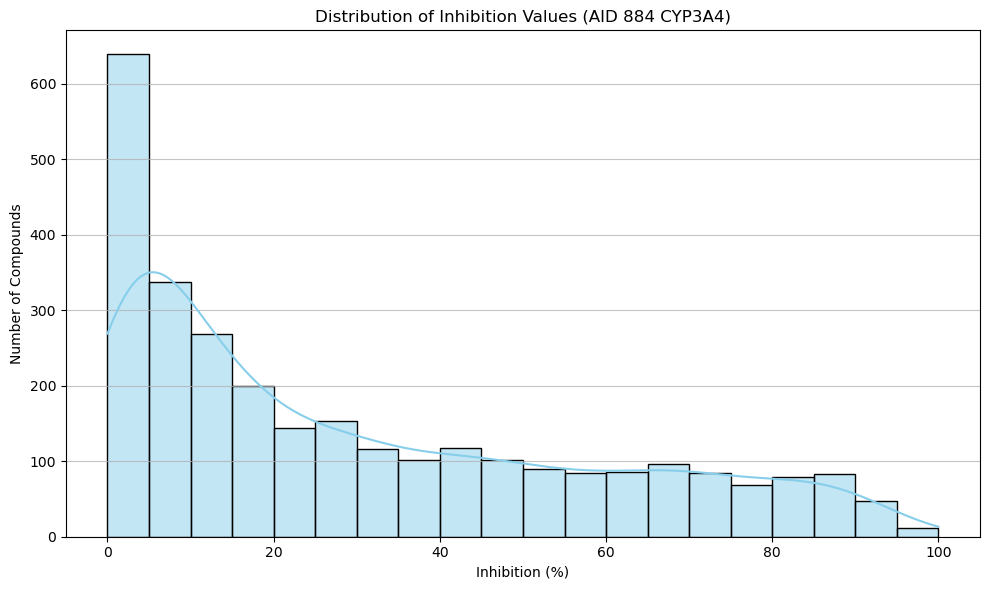

In [ ]:
print("--- 'Inhibition' 컬럼의 기술 통계량 ---")
print(df_pre['Inhibition 1'].describe())
print("\n")

plt.figure(figsize=(10, 6))
sns.histplot(df_pre['Inhibition 1'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Inhibition Values (AID 1671201 CYP3A4)')
plt.xlabel('Inhibition (%)')
plt.ylabel('Number of Compounds')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()

output_csv_file_name = r'../processed_data/aid_1671201_cyp3a4.csv'
df_pre.to_csv(output_csv_file_name, index=False)

print(f"정제된 데이터가 '{output_csv_file_name}'으로 저장되었습니다.")

In [ ]:
import pandas as pd

df = pd.read_csv(r'../processed_data/AID_1671201_cyp3a4.csv')
df.head()
def process_row(row):
    vals = [row['Inhibition 1'], row['Inhibition 2'], row['Inhibition 3']]

    # 세 값의 쌍별 차이 계산
    d = [
        (abs(vals[0] - vals[1]), [vals[0], vals[1]]),
        (abs(vals[0] - vals[2]), [vals[0], vals[2]]),
        (abs(vals[1] - vals[2]), [vals[1], vals[2]]),
    ]

    # 가장 차이가 작은 쌍 선택 (가장 유사한 두 값)
    d_min = min(d, key=lambda x: x[0])

    # 두 값의 평균 반환
    return sum(d_min[1]) / 2

# 새로운 컬럼 생성: 평균 Inhibition
df['Inhibition'] = df.apply(process_row, axis=1)

df_clean = df[['Canonical_Smiles', 'Inhibition']]
df_clean.head()
df_clean.info()
df_clean.to_csv(r'../processed_data/aid_1671201_mean.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2909 entries, 0 to 2908
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Canonical_Smiles  2909 non-null   object 
 1   Inhibition        2909 non-null   float64
dtypes: float64(1), object(1)
memory usage: 45.6+ KB
